In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("summary_df_combined_1.csv")

In [5]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
# Move the average reward column to the end
cols = [col for col in df.columns if col != "Average Reward"] + ["Average Reward"]
df = df[cols]


In [8]:
df

,Number of Lanes,Number of Vehicles,Vehicles Density,Reward Speed Range,Scaling Factor,Algorithm,Reward Standard Deviation,Observation Variance,Action Variance,Number of Transitions Observed,...,Average On Road Reward,Average Episode Length,Reward Sparsity,Transition Rewards Variance,Observation Type,Maximum Range (Lidar),Horizon (TimeToCollision),Initial Lane Id,Ego Spacing,Average Reward
0,4,50,1.0,0,5.5,2,0.075884,6.111606,0.005758,5416,...,1.0,60,1.000000,0.005758,0,0,0,3,2.0,0.754729
1,4,40,1.0,0,5.5,2,0.089004,9.313594,0.007922,3637,...,1.0,40,0.999175,0.007922,0,0,0,3,2.0,0.765053
2,4,50,1.0,0,5.5,2,0.086899,7.936457,0.007551,3627,...,1.0,38,1.000000,0.007551,0,0,0,3,2.0,0.760916
3,4,25,1.0,0,5.5,2,0.094445,10.303575,0.008920,3727,...,1.0,40,0.999732,0.008920,0,0,0,3,2.0,0.766873
4,4,50,1.0,0,5.5,2,0.091617,9.970945,0.008394,4278,...,1.0,45,0.999065,0.008394,0,0,0,3,2.0,0.762661
5,4,30,1.0,0,5.5,2,0.083105,7.675548,0.006906,3814,...,1.0,40,0.999476,0.006906,0,0,0,3,2.0,0.750377
6,4,50,1.0,0,5.5,2,0.075456,7.161883,0.005694,5045,...,1.0,53,0.999604,0.005694,0,0,0,3,2.0,0.759000
7,4,35,1.0,0,5.5,2,0.080824,8.266295,0.006533,3795,...,1.0,40,0.999209,0.006533,0,0,0,3,2.0,0.766752
8,4,50,1.0,0,5.5,0,0.142239,9.616851,0.020232,2175,...,1.0,40,1.000000,0.020232,0,0,0,3,2.0,0.787108
9,8,30,1.5,2,5.5,1,0.043973,0.924906,0.001934,5286,...,1.0,60,0.999622,0.001934,0,0,0,3,2.0,0.697054


In [9]:
df.to_csv("general_dataset.csv")

In [11]:
metafeatures = df.select_dtypes(include=['float64', 'int64']).copy()

In [12]:
metafeatures

,Number of Lanes,Number of Vehicles,Vehicles Density,Reward Speed Range,Scaling Factor,Algorithm,Reward Standard Deviation,Observation Variance,Action Variance,Number of Transitions Observed,...,Average On Road Reward,Average Episode Length,Reward Sparsity,Transition Rewards Variance,Observation Type,Maximum Range (Lidar),Horizon (TimeToCollision),Initial Lane Id,Ego Spacing,Average Reward
0,4,50,1.0,0,5.5,2,0.075884,6.111606,0.005758,5416,...,1.0,60,1.000000,0.005758,0,0,0,3,2.0,0.754729
1,4,40,1.0,0,5.5,2,0.089004,9.313594,0.007922,3637,...,1.0,40,0.999175,0.007922,0,0,0,3,2.0,0.765053
2,4,50,1.0,0,5.5,2,0.086899,7.936457,0.007551,3627,...,1.0,38,1.000000,0.007551,0,0,0,3,2.0,0.760916
3,4,25,1.0,0,5.5,2,0.094445,10.303575,0.008920,3727,...,1.0,40,0.999732,0.008920,0,0,0,3,2.0,0.766873
4,4,50,1.0,0,5.5,2,0.091617,9.970945,0.008394,4278,...,1.0,45,0.999065,0.008394,0,0,0,3,2.0,0.762661
5,4,30,1.0,0,5.5,2,0.083105,7.675548,0.006906,3814,...,1.0,40,0.999476,0.006906,0,0,0,3,2.0,0.750377
6,4,50,1.0,0,5.5,2,0.075456,7.161883,0.005694,5045,...,1.0,53,0.999604,0.005694,0,0,0,3,2.0,0.759000
7,4,35,1.0,0,5.5,2,0.080824,8.266295,0.006533,3795,...,1.0,40,0.999209,0.006533,0,0,0,3,2.0,0.766752
8,4,50,1.0,0,5.5,0,0.142239,9.616851,0.020232,2175,...,1.0,40,1.000000,0.020232,0,0,0,3,2.0,0.787108
9,8,30,1.5,2,5.5,1,0.043973,0.924906,0.001934,5286,...,1.0,60,0.999622,0.001934,0,0,0,3,2.0,0.697054


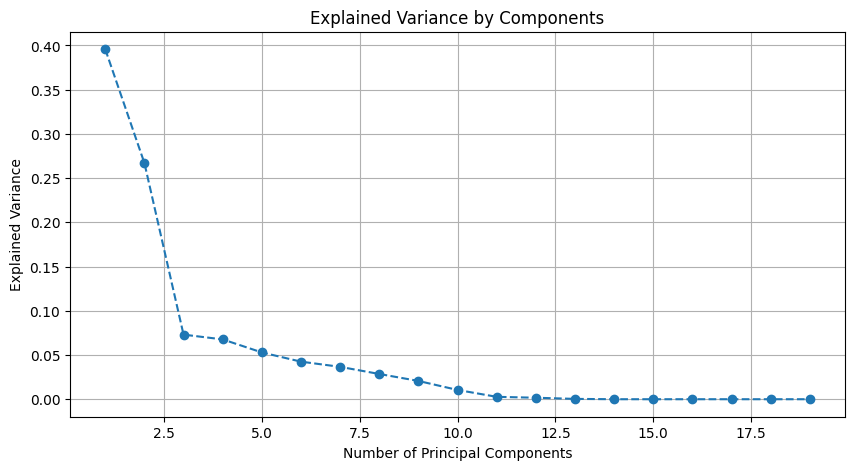

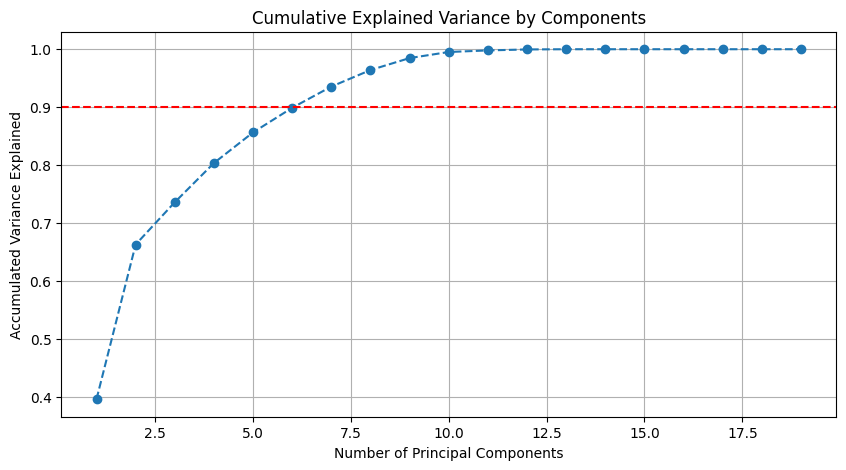

Number of components for 90% variance: 7


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# 2. Selecionar as características para PCA (excluindo a coluna de target)
features = df[['Number of Lanes', 'Number of Vehicles', 'Vehicles Density', 
                 'Reward Speed Range', 'Scaling Factor', 'Algorithm', 
                 'Reward Standard Deviation', 'Observation Variance', 
                 'Action Variance', 'Number of Transitions Observed', 
                 'Average On Road Reward', 'Average Episode Length', 
                 'Reward Sparsity', 'Transition Rewards Variance', 
                 'Observation Type', 'Maximum Range (Lidar)', 
                 'Horizon (TimeToCollision)', 'Initial Lane Id', 
                 'Ego Spacing']]

# 3. Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Aplicar PCA
pca = PCA()
pca.fit(scaled_features)

# 5. Visualizar a variância explicada
explained_variance = pca.explained_variance_ratio_

# Plotar a variância explicada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

# 6. Calcular a variância acumulada
cumulative_variance = np.cumsum(explained_variance)

# Plotar a variância acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')  # Linha para 90% de variância
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accumulated Variance Explained')
plt.grid()
plt.show()

# 7. Determinar o número de componentes que explicam 90% da variância
n_components = np.where(cumulative_variance >= 0.90)[0][0] + 1  # Adiciona 1 para obter o número correto
print(f"Number of components for 90% variance: {n_components}")

# 8. Re-aplicar PCA com o número ideal de componentes
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# 9. Criar DataFrame com os componentes principais e a coluna target
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
pca_df['Average Reward'] = df['Average Reward'].values  # Manter a coluna target

In [24]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Average Reward
0,-1.708643,0.188979,0.327975,-0.316093,-1.503619,2.103191,0.178161,0.754729
1,-0.790061,1.072183,-0.029168,0.432364,-0.390504,-0.067240,-0.664427,0.765053
2,-0.907027,1.489307,-0.016045,0.512952,-0.180079,-0.161226,0.221208,0.760916
3,-0.693945,0.527329,-0.128367,0.435073,-0.517010,-0.116216,-1.941581,0.766873
4,-0.929857,1.301400,0.188809,0.172550,-0.786715,0.535327,-0.007052,0.762661
5,-1.010857,0.506669,-0.187487,0.492618,-0.351147,-0.004509,-1.356170,0.750377
6,-1.547943,0.631181,0.227243,-0.073534,-1.153989,1.435539,0.129946,0.759000
7,-1.009310,0.758544,-0.123850,0.467758,-0.369455,-0.011845,-0.998622,0.766752
8,0.995316,0.712294,0.769905,-0.319556,-0.923668,-0.974758,1.594021,0.787108
9,-1.947792,-3.253384,1.553699,-0.645608,0.205850,1.289187,-0.615770,0.697054


In [25]:
pca_df.to_csv("pca_dataset.csv")

# Tentativas antigas

C:\Users\Caty\AppData\Local\Temp\ipykernel_3016\254940545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_1'] = pca_result[:, 0]
C:\Users\Caty\AppData\Local\Temp\ipykernel_3016\254940545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_2'] = pca_result[:, 1]


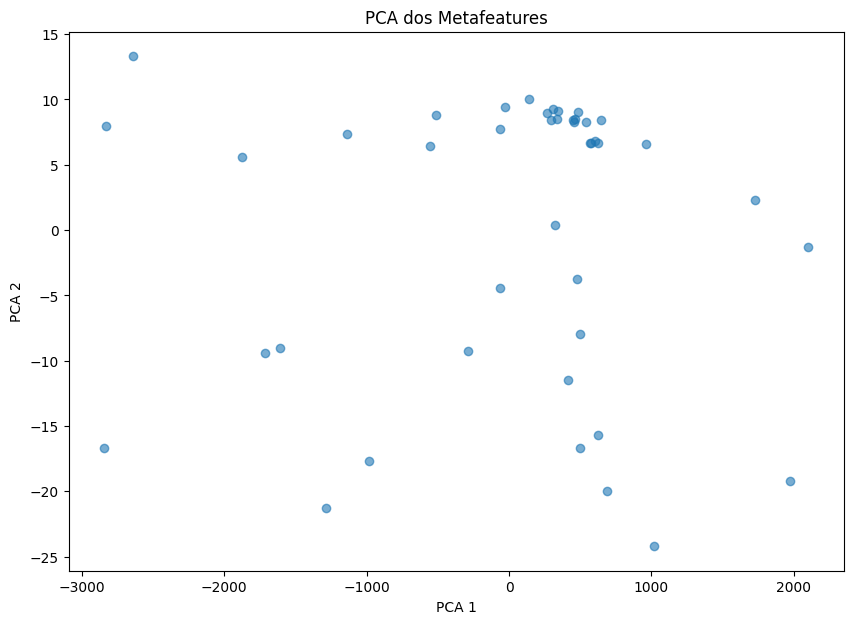

In [13]:
# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(metafeatures)

# Adicionar os resultados ao dataframe para visualização
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Visualização
plt.figure(figsize=(10, 7))
plt.scatter(df['pca_1'], df['pca_2'], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA dos Metafeatures")
plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Incluir a coluna target para observar a relação
features = df[['Number of Lanes', 'Number of Vehicles', 'Vehicles Density', 
                 'Reward Speed Range', 'Scaling Factor', 'Algorithm', 
                 'Reward Standard Deviation', 'Observation Variance', 
                 'Action Variance', 'Number of Transitions Observed', 
                 'Average On Road Reward', 'Average Episode Length', 
                 'Reward Sparsity', 'Transition Rewards Variance', 
                 'Observation Type', 'Maximum Range (Lidar)', 
                 'Horizon (TimeToCollision)', 'Initial Lane Id', 
                 'Ego Spacing', 'Average Reward']]  # Incluindo Average Reward

# Normalização
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
n_components = 10
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Criar DataFrame com os componentes principais e a coluna target
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components)])
pca_df['Average Reward'] = df['Average Reward'].values  # Manter a coluna target



In [18]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Average Reward
0,-1.796439,-0.048820,0.354528,-0.300011,-0.681481,2.504963,0.038243,-0.839979,-0.302695,0.304594,0.754729
1,-1.119838,1.019125,0.030367,0.396539,-0.471050,-0.019850,-0.638931,0.499570,-0.115506,-0.033168,0.765053
2,-1.246609,1.378870,-0.065692,0.504716,-0.182774,-0.060126,0.253297,0.063829,-0.211909,-0.084302,0.760916
3,-0.981536,0.523903,0.040265,0.362056,-0.758398,-0.172270,-1.907404,1.251819,-0.047940,-0.151680,0.766873
4,-1.264007,1.206443,0.226955,0.164619,-0.536543,0.755612,-0.024157,-0.279738,0.011601,0.213597,0.762661
5,-1.157296,0.377303,-0.166337,0.449887,-0.431895,0.001215,-1.321437,1.011464,-0.297400,-0.397542,0.750377
6,-1.729461,0.423999,0.240473,-0.067467,-0.577300,1.753312,0.041819,-0.592075,-0.192560,0.173035,0.759000
7,-1.295452,0.678835,-0.056373,0.421046,-0.489350,-0.010073,-0.979197,0.750163,-0.181173,-0.202203,0.766752
8,0.420626,1.115026,1.226991,-0.362513,-1.151409,-0.656391,1.672905,1.527397,0.520688,0.154546,0.787108
9,-1.218191,-3.616994,1.355502,-0.431611,0.953192,1.245762,-0.722224,-0.378068,0.373665,-0.489548,0.697054


In [19]:
pca_df.to_csv("pca_dataset.csv")

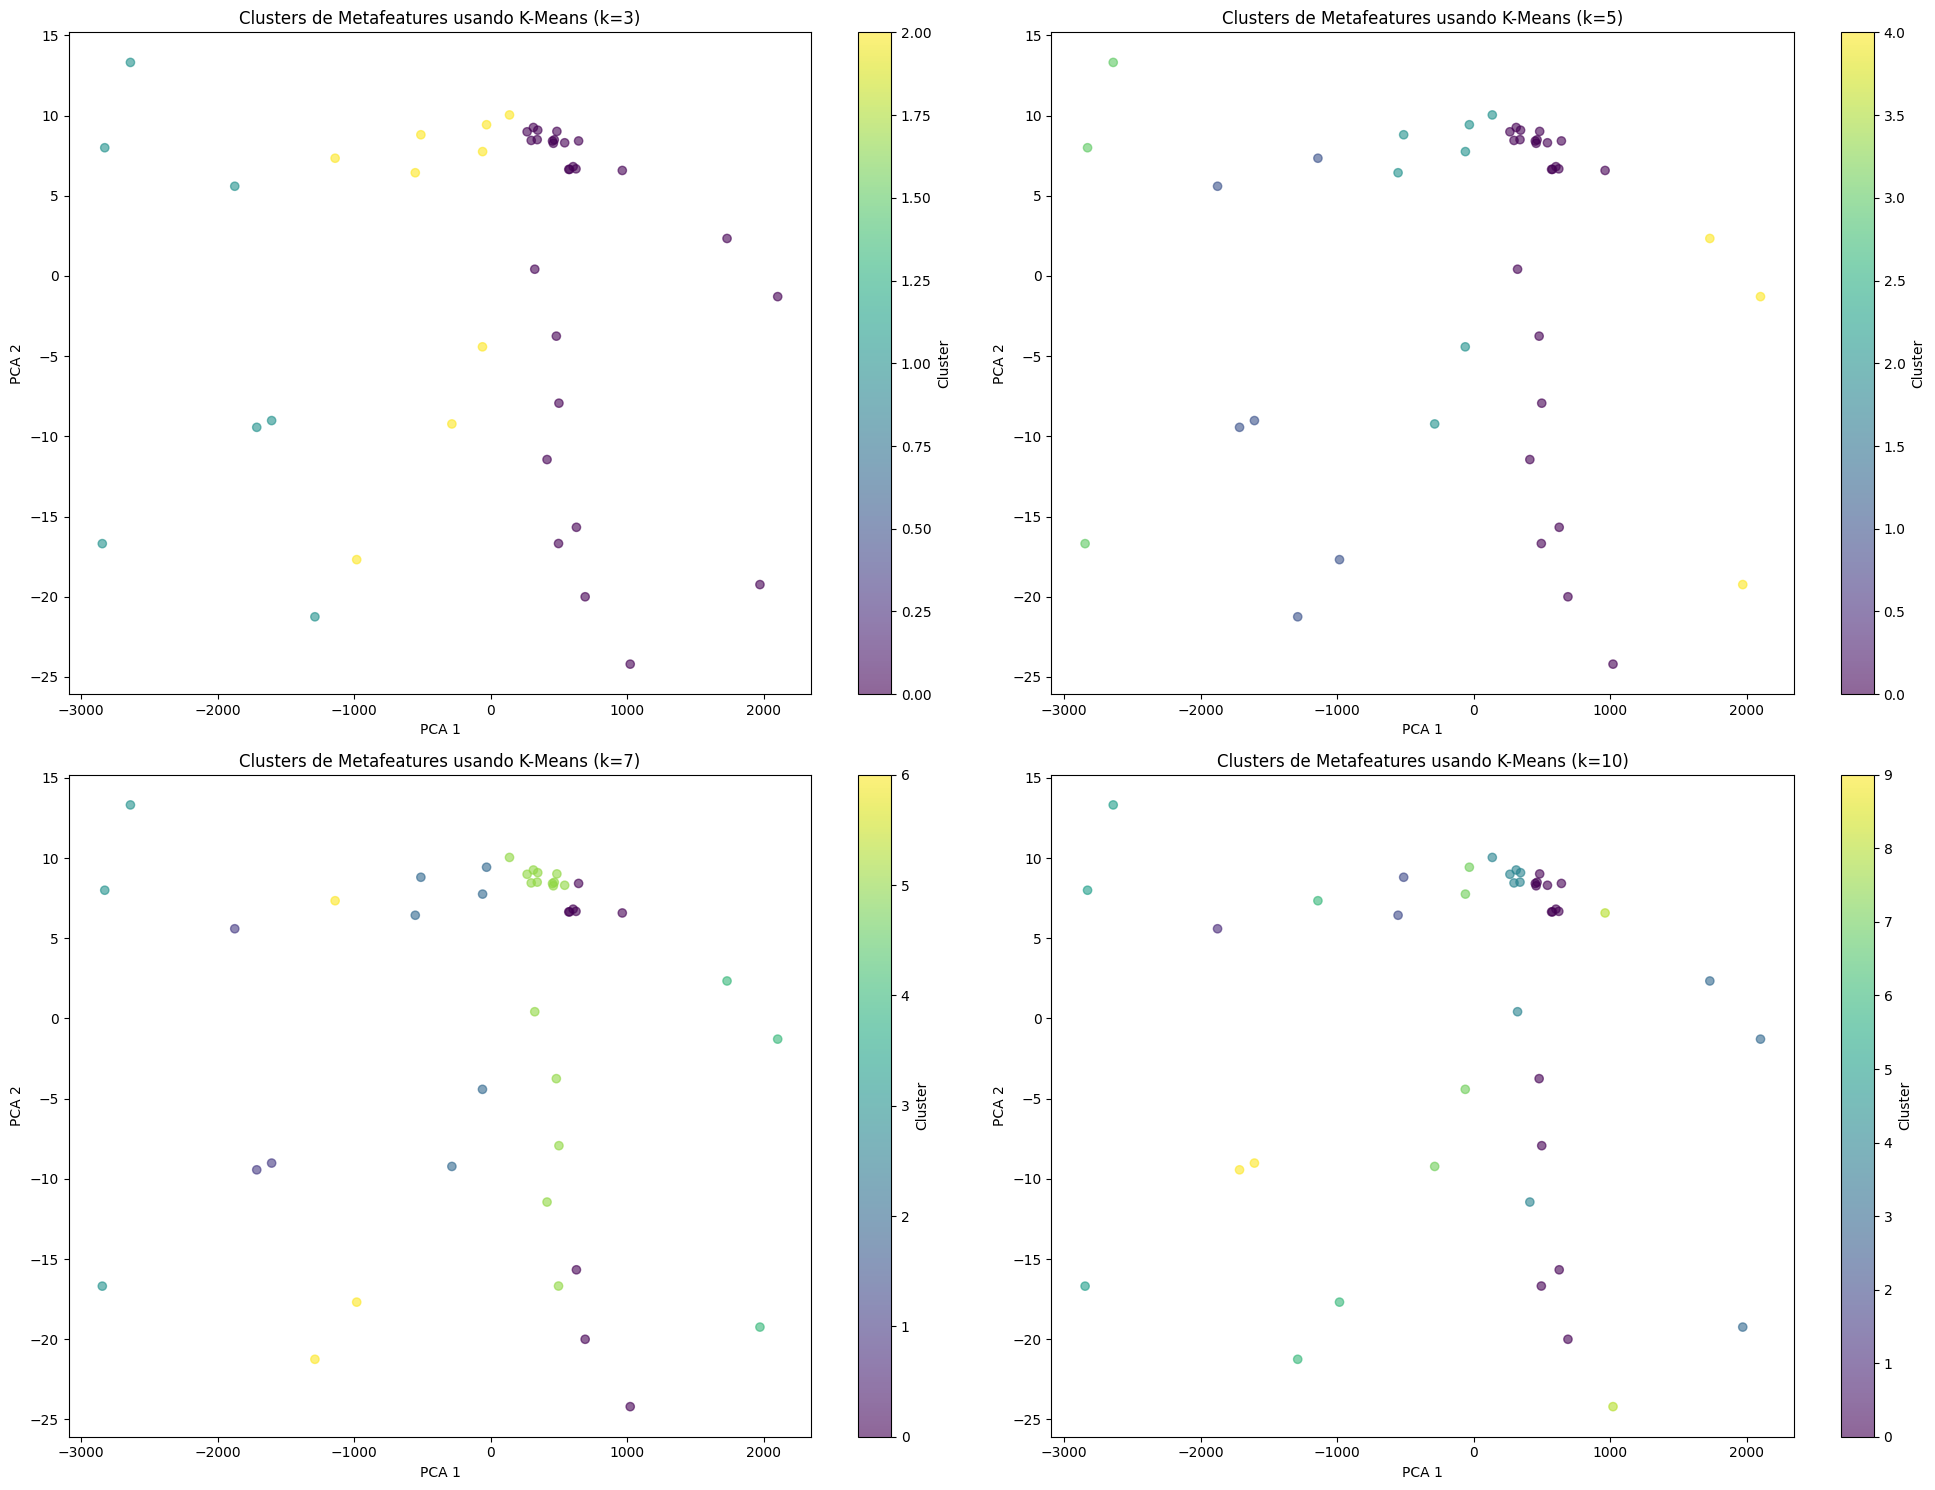

In [31]:
# Lista com o número de clusters desejados
num_clusters_list = [3, 5, 7, 10]

# Criar os gráficos para cada número de clusters
plt.figure(figsize=(20, 15))  # Tamanho da figura para múltiplos gráficos

for i, num_clusters in enumerate(num_clusters_list, start=1):
    # Ajustando o modelo K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    df['cluster'] = kmeans.fit_predict(metafeatures)

    # Subplot para cada número de clusters
    plt.subplot(2, 2, i)  # 2 linhas, 2 colunas, índice i
    plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster'], cmap='viridis', alpha=0.6)
    plt.title(f"Clusters de Metafeatures usando K-Means (k={num_clusters})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')

# Ajustar o layout
plt.tight_layout()
plt.show()